Final Project Check-in 2018-11-14
------

Group Name
-----

Student Names
----

1. Rebecca Reilly
2. Viviana Marquez
3. Victoria Suarez
4. Fiorella Tenorio
5. Katja Wittfoth 

Load Data
-----

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction import stop_words
import string
import re

In [2]:
def clean_lyrics(text):
    text = re.sub('\n', ' ', text)
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)  # delete stuff but leave at least a space to avoid clumping together
    words = nopunct.split(" ")
    words = [w for w in words if len(w) > 2]  # ignore a, an, to, at, be, ...
    words = [w.lower() for w in words]
    words = [w for w in words if w not in stop_words.ENGLISH_STOP_WORDS]
    return words

In [3]:
df = pd.read_csv('../Final Project/Data/lyrics.csv')

In [4]:
df = df[pd.notnull(df['lyrics'])]
df = df[df['genre']!= 'Not Available']
df = df[df['genre']!= 'Other']
df['lyrics_clean'] = df.lyrics.apply(clean_lyrics)

In [5]:
df.genre.unique()

array(['Pop', 'Hip-Hop', 'Rock', 'Metal', 'Country', 'Jazz', 'Electronic',
       'Folk', 'R&B', 'Indie'], dtype=object)

In [6]:
df_clean = df[(df.genre == 'Country') | (df.genre == 'Metal') | (df.genre == 'Hip-Hop') | (df.genre == 'Jazz')
       | (df.genre == 'Electronic') ]

Fit scikit-learn model
----

In [7]:
train, test = train_test_split(df_clean, test_size=0.2)
train_lyrics = train['lyrics']
train_genre = train['genre']

In [8]:
vectorizer = CountVectorizer(stop_words='english', 
                             lowercase=False, 
                             analyzer = 'word')
train_lyrics = vectorizer.fit_transform(train_lyrics)
test_lyrics = vectorizer.transform(test['lyrics'])

In [9]:
pipeline = Pipeline([('clf', MultinomialNB(alpha=.2))]) 

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
grid_params = dict(clf__alpha = np.arange(start=0, stop = 0.25, step = 0.05))

gs = GridSearchCV(estimator=pipeline,  
                  param_grid=grid_params,
                  scoring='accuracy',
                  cv=10)

In [ ]:
gs.fit(train_lyrics, train_genre)
f"{gs.score(test_lyrics, test['genre']):.4f}"

In [13]:
gs.best_params_

{'clf__alpha': 0.05}

In [14]:
gs.best_estimator_.steps[0][1] # best model

MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)

In [15]:
pred = gs.best_estimator_.predict(test_lyrics)

Evaluation Metric
----

In [16]:
con_mat = confusion_matrix(test['genre'], pred)

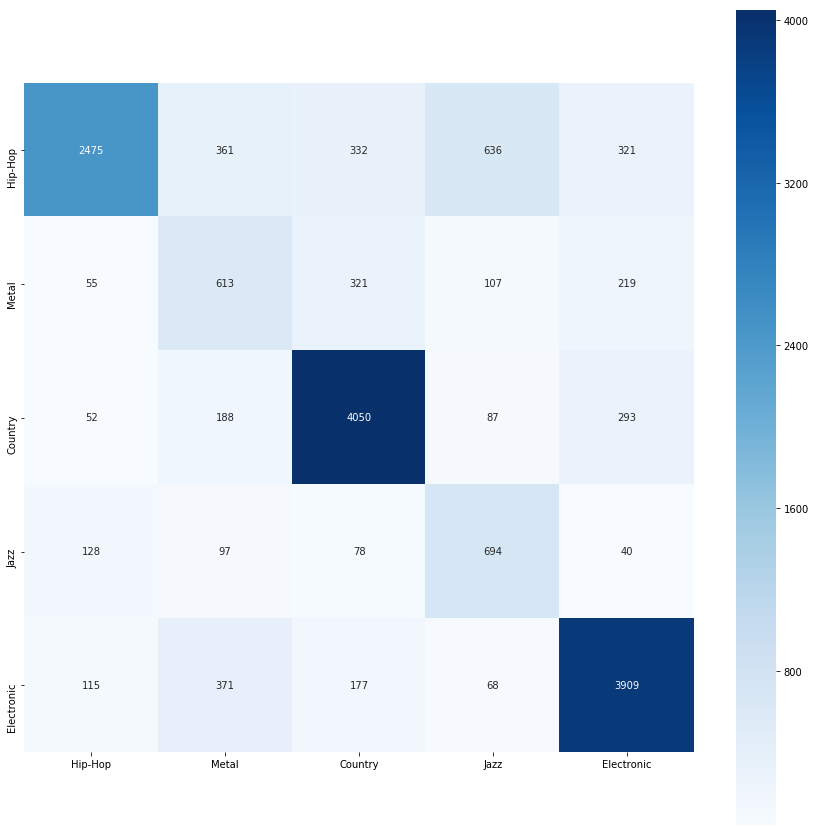

In [20]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(con_mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=df_clean.genre.unique(), yticklabels=df_clean.genre.unique(), cmap="Blues")

In [21]:
round(accuracy_score(pred, test['genre']) ,3)

0.744